In [13]:
# importing...
from locale import normalize
from statistics import mean
# from turtle import color
import pandas as pd
import json
import os
import warnings
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import seaborn as sns
from scipy import stats
from pingouin import multivariate_normality
from tabulate import tabulate

In [14]:
# Helpers for statistical analysis
def single_variable_normality_test(test_array):
    k, p = stats.normaltest(test_array)
    # threshold = 1e-2
    threshold = 0.05
    if p < threshold:
        # print("Null hypothesis Rejected")
        return False
    else:
        # print("Null hypothesis Accepted")
        return True

def anova_test(samples):
    """
    Anova test
    """
    fvalue, pvalue = stats.f_oneway(*samples)
    threshold = 0.05
    if pvalue < threshold:
        # print("Null hypothesis rejected, there are differences among groups")
        return p, True
    else:
        return p, False

def kw_test(samples, bon_correction=False):
    """
    Kruskal-Wallis test for non-parametric group
    """
    kw, p = stats.kruskal(*samples)
    threshold = 0.05
    if bon_correction:
        correction = len(samples)*(len(samples) - 1)/2
        threshold = threshold/correction
    if p < threshold:
        # print("Rejecting Hypothesis, differences exists")
        return p, True
    else:
        return p, False

def post_hoc_mannwhiteu_test(data1, data2, bonferroni=False):
    u1, p = stats.mannwhitneyu(data1, data2, method="asymptotic")
    threshold = 0.05
    if p < threshold:
        n = True
    else:
        n = False
    # print(u1)
    # print(p)
    # print(n)
    less = "undefined"
    if n:
        # Determine if it is less or more
        _u1, _p = stats.mannwhitneyu(data1, data2, alternative="less", method="asymptotic")
        if _p < threshold:
            less = "smaller"
        else:
            _u1, _p = stats.mannwhitneyu(data2, data1, alternative="less", method="asymptotic")
            if _p < threshold:
                less = "bigger"
    return u1, p, n, less


In [34]:
INPUT_DIR = os.path.join(os.getcwd(), "output")
INPUT_DATA = os.path.join(INPUT_DIR, "children_exploration_results.csv")

# Processing data, Treatment Group/Control Group, (Pre/Post, Intervention)
data = pd.read_csv(INPUT_DATA)
session_num = []
study_group = []
pre_post_intervention = []

# Column Manipulation
for index, row in data.iterrows():
    session_num.append(int(row['session_id'].split('_')[0]))
    study_code = row['study_code']

    if 'treatment' in study_code:
        study_group.append('treatment')
    elif 'control' in study_code:
        study_group.append('control')
    else:
        warnings.warn("study code is neither treatment nor control: " + study_code)
    
    if '-' in study_code:
        pre_post = study_code.split('-')[-1]
        pre_post_intervention.append(pre_post)
    else:
        pre_post_intervention.append("intervention")
data['session number'] = session_num
data['group'] = study_group
data['interaction'] = pre_post_intervention
# print(data.head(5))

## Data Analysis Catalog

### 1. Pre-Intervention and Post-Intervention Sessions Analysis

### 2. Behaviroal Change in Intervention Sessions

### 3. Pre-Intervention Session with First Two Intervention Sessions

### 4. Exploration Correlation with Children's Prior Exploration

### 5. Exploration Correlation with Children's Prior Knowledge

### Part 1: Pre-Intervention and Post-Intervention Sessions Analaysis

In [40]:
def get_normalized_dataframe(data, plotting_value):
    columns_in_question = ['session number', 'child_id', 'interaction', plotting_value]
    # Normalization
    normalized = {
        'child_id': [],
        'session number': [],
        'normalized_by_child': [],
        'original_vals': [],
        'group': []
    }
    for group_condition in ['treatment', 'control']:
        group_data = data[data['group'] == group_condition][columns_in_question]
        # Plot 1: Plotting trend
        child_in_group = list(set(group_data['child_id'].values))
        child_in_group.sort()
        print("%d Children In %s"%(len(child_in_group), group_condition))
        for child in child_in_group:
            # legend.append(child)
            child_data = group_data[group_data['child_id'] == child].copy()
            child_data = child_data.sort_values('session number')
            child_vals = list(child_data[plotting_value])
            normalized_vals = list(preprocessing.normalize([child_vals])[0])
            normalized['child_id'] += list(child_data['child_id'].values)
            normalized['session number'] += list(child_data['session number'].values)
            normalized['normalized_by_child'] += list(normalized_vals)
            normalized['original_vals'] += list(child_vals)
            normalized['group'] += len(child_data['child_id'].values) * [group_condition]
            # child_data['normalized'] = normalized_vals
            # # child_data = child_data[child_data['session number'].between(2, 5)]
            # # child_data = child_data[child_data['session number'].between(0, 3)]
            # child_data = child_data[child_data['session number'].isin([1, 8])]
            # plt.plot(child_data['session number'], child_data['normalized'])
            # ax = sns.regplot(x="session number", y='normalized', data=child_data).set(title=group_condition + " " + child)
            # plt.ylim(-0.1, 1)
            # plt.show(block=True)
    normalized_dataframe = pd.DataFrame(normalized)
    return normalized_dataframe
    

8 Children In treatment
9 Children In control
  child_id  session number  normalized_by_child  original_vals      group
0     c304               1             0.816529      22.071429  treatment
1     c304               2             0.266363       7.200000  treatment
2     c304               3             0.356319       9.631579  treatment
3     c304               4             0.329870       8.916667  treatment
4     c304               5             0.160311       4.333333  treatment
c304
  child_id  session number  normalized_by_child  original_vals      group
0     c304               1             0.816529      22.071429  treatment
7     c304               8             0.028458       0.769231  treatment
c306
   child_id  session number  normalized_by_child  original_vals      group
8      c306               1             0.101357       1.090909  treatment
15     c306               8             0.143589       1.545455  treatment
c346
   child_id  session number  normalized_by_child

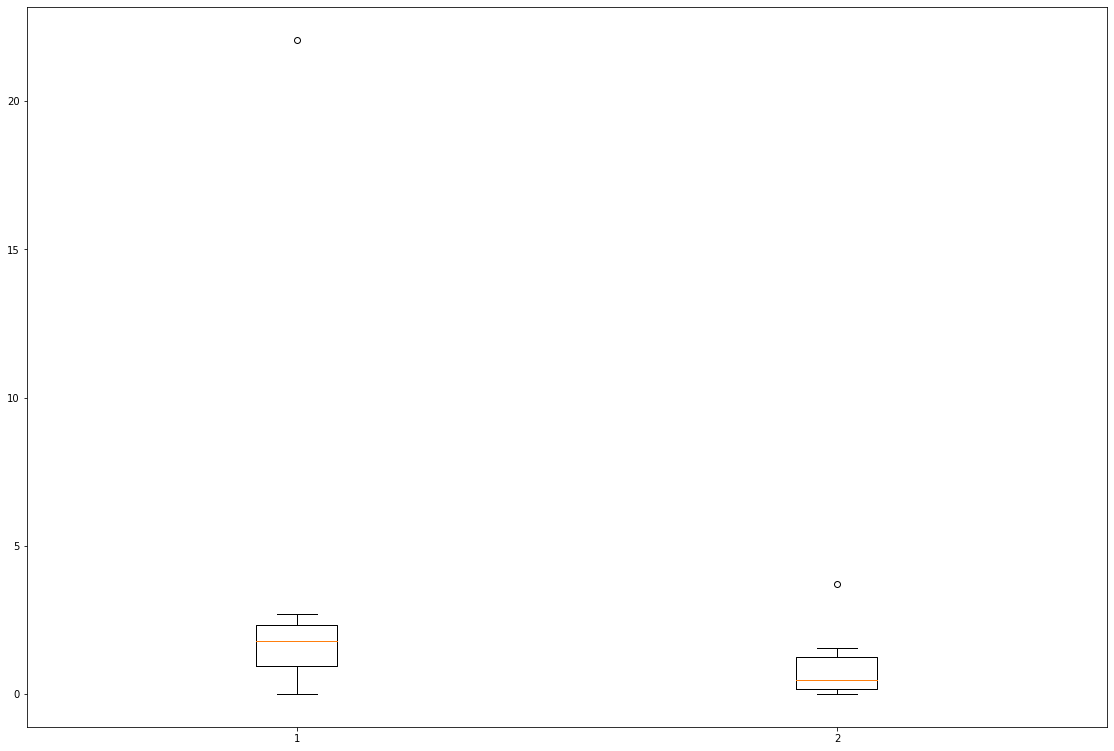

c322
   child_id  session number  normalized_by_child  original_vals    group
88     c322               1             0.368900       1.052632  control
95     c322               8             0.323497       0.923077  control
c355
    child_id  session number  normalized_by_child  original_vals    group
112     c355               1             0.473719       1.181818  control
119     c355               8             0.801679       2.000000  control
c349
    child_id  session number  normalized_by_child  original_vals    group
104     c349               1             0.097553       0.133333  control
111     c349               8             0.112561       0.153846  control
c370
    child_id  session number  normalized_by_child  original_vals    group
128     c370               1             0.026959       0.192308  control
135     c370               8             0.186917       1.333333  control
c309
   child_id  session number  normalized_by_child  original_vals    group
72     c309      

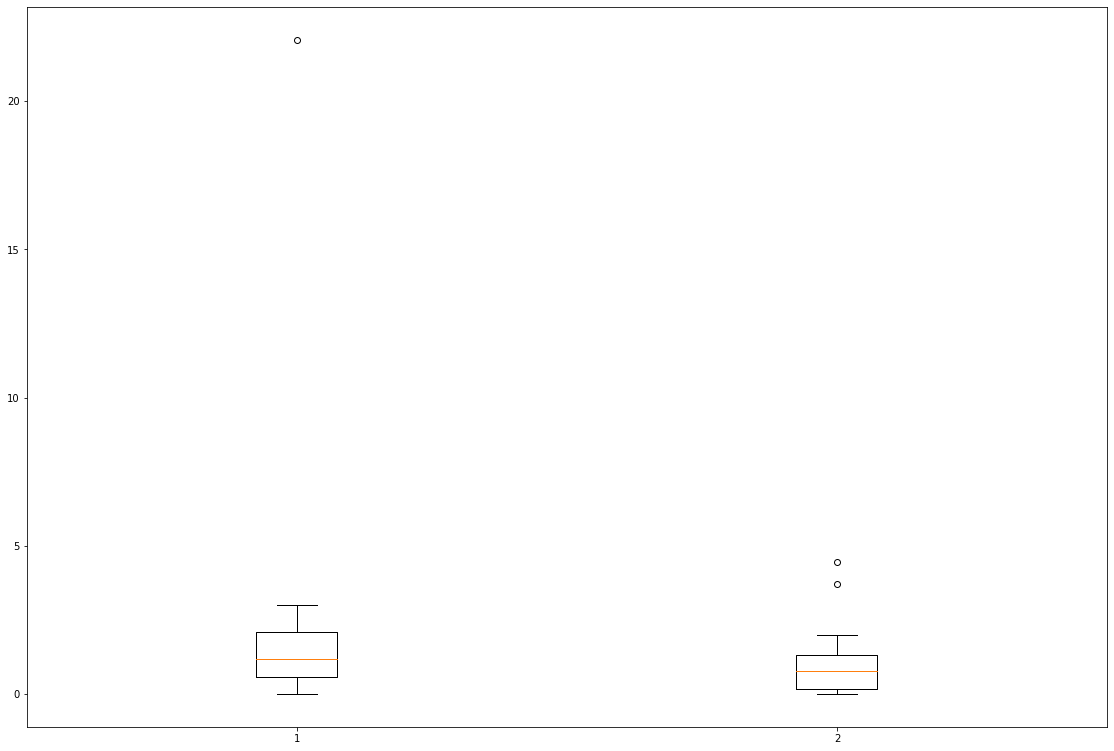

In [44]:
plotting_value = 'total_avg'
# plotting_value = 'total_sum'
# plotting_value = 'decoding_sum'
# plotting_value = 'explanation_sum'
# plotting_value = 'decoding_explanation_sum'

normalized_df = get_normalized_dataframe(data, plotting_value)
print(normalized_df.head(5))
# Step 1: Plot box plots
all_child_data = []
for group_condition in ['treatment', 'control']:
    normalized_group_data = normalized_df[normalized_df['group'] == group_condition]
    for child in list(set(normalized_group_data['child_id'].values)):
        print(child)
        # Get Child's sessions
        child_data = normalized_group_data[normalized_group_data['child_id'] == child]
        child_data = child_data[child_data['session number'].isin([1, 8])]
        child_data.sort_values('session number')
        print(child_data)
        all_child_data.append(child_data['normalized_vals'])

        # child_data = group_data[group_data['child_id'] == child]
        # pre_val = child_data[child_data['interaction'] == 'pre'][plotting_value].values[0]
        # post_val = child_data[child_data['interaction'] == 'post'][plotting_value].values[0]
        # mid_val = mean(child_data[child_data['interaction'] == 'intervention'][plotting_value].values)
        # # print(child, pre_val, post_val)
        # child_mean = mean([pre_val, post_val, mid_val])
        # if child_mean == 0:
        #     child_mean = 1
        # pre_rst.append(pre_val/child_mean)
        # post_rst.append(post_val/child_mean)
        # mid_rst.append(mid_val/child_mean)
    child_array = np.array(all_child_data)
    # plt_data = np.transpose(child_array)
    plt_data = child_array
    print(plt_data)
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_axes([0, 0, 1, 1])
    boxplt = ax.boxplot(plt_data)
    plt.show()